### Computational photography - lab 9

This assignment was on the subject of automatically compositing a masked input image into a background from another image using Poisson image compositing.

The assignment took about 3 hours to complete.

The results are impressive, clearly showing the capabilities of the method.
The gradient descent approach is slow to converge, but the improved Conjugate method converges quickly. 

In [118]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


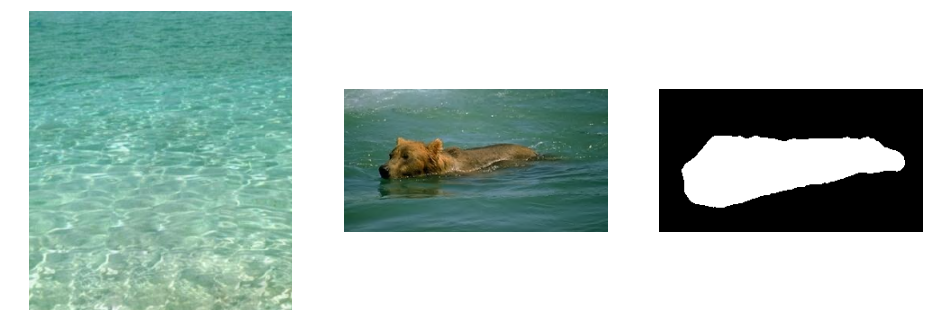

In [119]:
waterpool = imread("data/waterpool.png")
bear = imread("data/bear.png")
mask = imread("data/mask.png")

def showthree(i1,i2,i3):
    figure(figsize=(16,16))
    subplot(1,3,1)
    axis("off")
    imshow(i1)
    subplot(1,3,2)
    axis("off")
    imshow(i2)
    subplot(1,3,3)
    axis("off")
    imshow(i3)
    
showthree(waterpool, bear, mask)

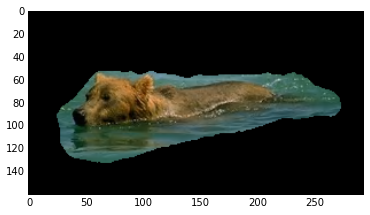

In [120]:
onlybear = bear*(mask==1)
imshow(onlybear)

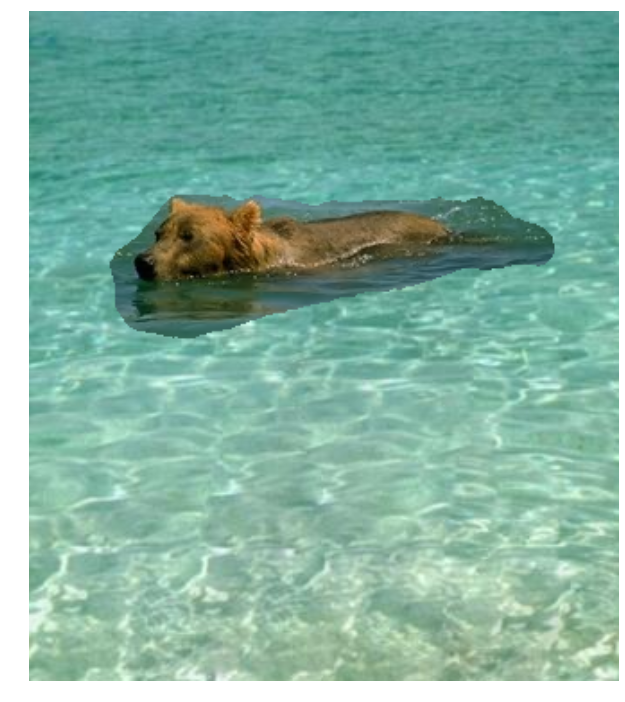

In [121]:
def naiveComposite(bg, fg, mask, y, x):
    result = bg
    result[y:mask.shape[0]+y, x:mask.shape[1]+x] *= mask==0
    result[y:mask.shape[0]+y, x:mask.shape[1]+x] += fg*(mask==1)
    return result
    
composed = naiveComposite(waterpool, bear, mask, 50, 20)
figure(figsize=(12,12))
axis("off")
imshow(composed)

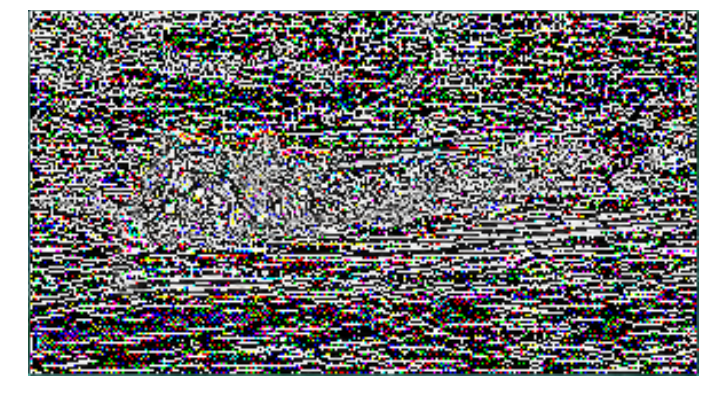

In [122]:
from scipy import signal

def laplacian(image):
    return dstack([signal.convolve2d(image[:,:,i], [[0,-1,0],[-1,4,-1],[0,-1,0]], mode='same') \
                   for i in range(image.shape[2])])

b = laplacian(bear)

figure(figsize=(12,12))
axis("off")
imshow(b)

In [123]:
def dotIm(im1, im2):
    return sum(im1*im2)

In [124]:
def poisson(bg, fg, mask, iters):
    b = laplacian(fg)
    x = bg*(mask==0)
    for i in range(iters):
        r_i = b - laplacian(x)
        r_i *= (mask!=0)
        alpha = dotIm(r_i,r_i)/dotIm(r_i,laplacian(r_i))
        x = x + alpha*r_i
    return x

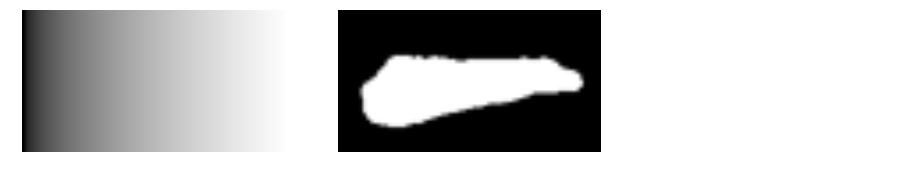

In [125]:
background = imread("data/ramp.png")
mask = imread("data/mask3.png")
foreground = imread("data/fg.png")

showthree(background, mask, foreground)

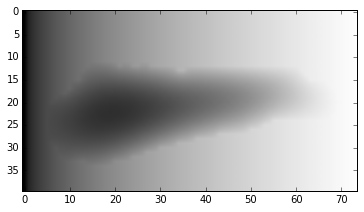

In [126]:
descended = poisson(background, foreground, mask, 100)
imshow(descended)

In [127]:
def showarray(perrow, images):    
    figure(figsize=(16,8))
    for i in range(len(images)):
        subplot((len(images)/perrow),perrow,i+1)
        axis("off")
        imshow(images[i])

In [138]:
iterations = [1,5,10,20,35,50,75,100,150,200,400,1000]

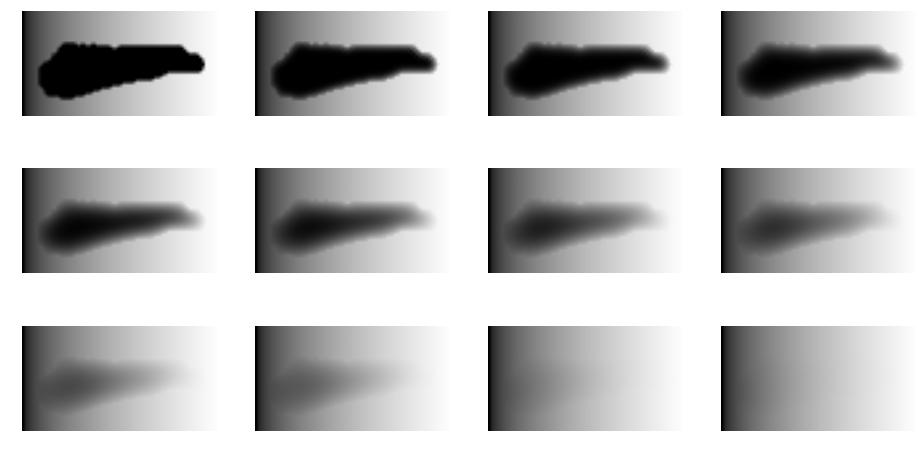

In [139]:
showarray(4,[poisson(background, foreground, mask, i) for i in iterations])

In [133]:
def poisson_conjugate(bg, fg, mask, iters):
    b = laplacian(fg)
    x = bg*(mask==0)
    r = (b - laplacian(x))*(mask!=0)
    d = r
    for i in range(iters):
        alpha = dotIm(r,r)/dotIm(d,laplacian(d))
        x = x + alpha*d
        r_next = r - alpha*laplacian(d)        
        r_next *= (mask!=0)
        beta = dotIm(r_next,r_next)/dotIm(r,r)
        d = r_next + beta*d
        d *= (mask!=0)
        r = r_next
    return x

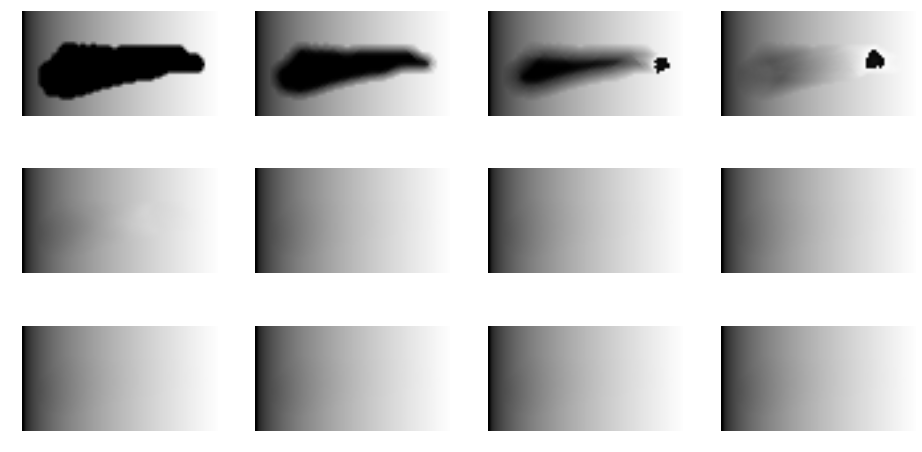

In [137]:
showarray(4,[poisson_conjugate(background, foreground, mask, i) for i in iterations])

For the regular gradient descent, 3000 iterations are necessery for the method to converge

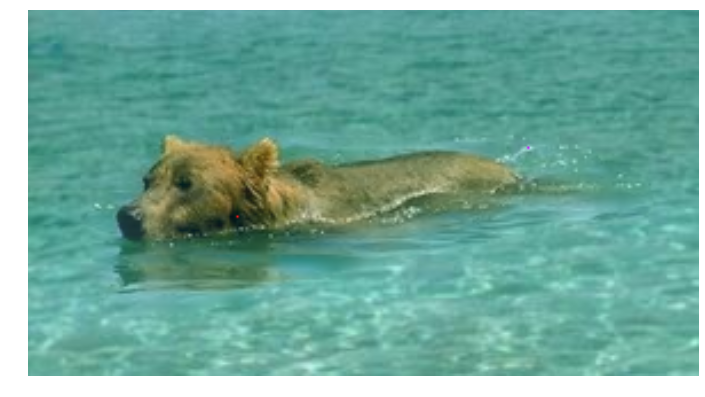

In [147]:
waterpool = imread("data/waterpool.png")
bear = imread("data/bear.png")
mask = imread("data/mask.png")

cropped_pool = waterpool[0:bear.shape[0],0:bear.shape[1],:]

figure(figsize=(12,12))
axis("off")
imshow(poisson(cropped_pool, bear, mask, 3000))

When using the conjugate method, 100 iterations are enough, making the computations much faster. 

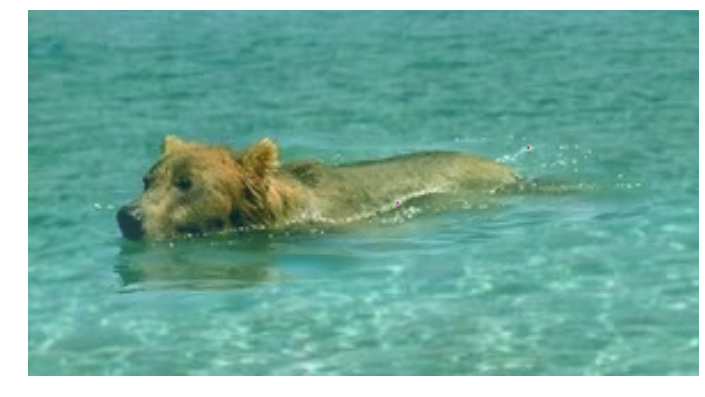

In [156]:
figure(figsize=(12,12))
axis("off")
imshow(poisson_conjugate(cropped_pool, bear, mask, 100))